# Introduction to Gaussian Process

Author: Matheus Schossler

Date: January 2029, 2023

A **Gaussian process** are used to define probability distribution
over functions. With this concept, we can build the Gaussian process
regression algorithm (GPR), which is a data-based prediction method
with good performance in dealing with high dimension small samples,
nonlinear problems. Let us start with a simpler algorithm to build
our intuition around Gaussian processes: the Bayesian linear regression. 

## References

1. C. E. Rasmussen & C. K. I. Williams, Gaussian Processes for Machine Learning, the MIT Press, 2006, ISBN 026218253X. c© 2006 Massachusetts Institute of Technology.
2. Ryan G. McClarren, Uncertainty Quantification and Predictive Computational Science, Springer, 2018, https://doi.org/10.1007/978-3-319-99525-0
3. https://ndcbe.github.io/cbe67701-uncertainty-quantification/
4. https://juanitorduz.github.io/gaussian_process_reg/
5. CS229 Lecture Notes Andrew Ng, Updated by Tengyu Ma, https://cs229.stanford.edu/notes2022fall/main_notes.pdf

Other references are indicated in the text.

In [2]:
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:80% !important; }</style>"))

## Bayesian Linear Regression

Let $S=\left\{ \left(x^{(i)},y^{(i)}\right)\right\} _{i=1}^{m}$be
a training set of i.i.d. examples from a unknown distribution. The
linear regression states that 

\begin{equation}
y^{(i)}=\theta^{T}x^{(i)}+\varepsilon\label{1}
\tag{1.1}\end{equation}

where $\varepsilon$ are i.i.d. noise with $\mathcal{N}\left(0,\sigma^{2}\right)$
distribution. This implies

\begin{equation}
p\left(y^{(i)}|x^{(i)},\theta\right)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{y^{(i)}-\theta^{T}x^{(i)}}{2\sigma^{2}}\right).\label{1.2}
\tag{1.2}\end{equation}

In Bayesian linear regression, we assume a **prior distribution**
over parameters is also given, 

\begin{equation}
\theta\sim\mathcal{N}\left(0,\tau^{2}I\right),
\tag{1.3}\end{equation}

which from Bayes's rule, the $\theta$ distribution conditioned to
$S$ is 

\begin{equation}
p(\theta|S)=\frac{p(\theta)p(S|\theta)}{\int_{\theta'}p(\theta')p(S|\theta')d\theta'}.
\tag{1.4}\end{equation}

In this model $p(S|\theta)=\prod_{i}p\left(y^{(i)}|x^{(i)},\theta\right)$,
where $p\left(y^{(i)}|x^{(i)},\theta\right)$ is the normal distribution
defined in \ref{1.2}. The output of this model on a new test point
$x_{*}$is given by the **posterior predictive distribution**

\begin{equation}
p(y_{*}|x_{*},S)=\int_{\theta}p(y_{*}|x_{*},\theta)p(\theta|S)d\theta.
\tag{1.5}\end{equation}

For the linear regression model above, we can express both $p(\theta|S)$
and $p(y_{*}|x_{*},S)$ in terms of a closed formula of $X_{*},S,\sigma,\tau$.
It can be shown that BLR is a GPR with the kernel given by the Dot-Product.

## Gaussian Process

A Gaussian Process is a collection of random variables, any finite
number of which have (consistent) joint Gaussian distributions. A
Gaussian process is fully specified by its mean function $m(x)$ and
covariance function $k(x,x')$:

\begin{equation}
f\sim\mathcal{GP}(m,k),
\tag{2.1}\end{equation}

which reads "the function $f$ is distributed as a GP with mean
function $m$ and covariance function $k$". We use a set of indexes
$\{x_{i}\in\mathcal{X}\}_{i=1}^{m}$ to denote the equation above
in terms of their vector notation $\boldsymbol{f}$:

\begin{equation}
\left[\begin{array}{c}
f(x_{1})\\
\vdots\\
f(x_{m})
\end{array}\right]\sim\mathcal{N}\left(\left[\begin{array}{c}
m(x_{1})\\
\vdots\\
m(x_{m})
\end{array}\right],\left[\begin{array}{ccc}
k(x_{1},x_{1}) & \cdots & k(x_{1},x_{m})\\
\vdots & \ddots & \vdots\\
k(x_{m},x_{1}) & \cdots & k(x_{m},x_{m})
\end{array}\right]\right),
\tag{2.2}\end{equation}

where $\mathcal{N}\left(\mu,\Sigma\right)$ denotes
a multivariate Gaussian distribution with mean $\mu\in\mathbb{R}^{n}$
and covariance matrix $\Sigma$ as defined above.

### Example

The Bayesian linear model suffers from limited expressiveness. A very
simple idea to overcome this problem is to project the inputs into
some high dimensional space using a set of basis feature space functions,
e.g. $\left\{ 1,x,x^{2},\ldots,x^{d-1}\right\} $, and then apply
the linear model in this space instead of directly on the inputs themselves.
This type of map also defines a simple example of a Gaussian process:

\begin{equation}
f(\boldsymbol{x})=\phi\left(\boldsymbol{x}\right)^{T}\boldsymbol{\theta}
\tag{2.3}\end{equation}

where $\boldsymbol{x}$ is a $p$ variable input, $\phi\left(\boldsymbol{x}\right)$ is a $p\times d$ dimension vector, and the prior $\boldsymbol{\theta}\sim\mathcal{N}\left(\boldsymbol{0},\Sigma_{p}\right)$,
where $\Sigma_{p}$ is a a $p\times p$ covariance matrix, which implies

\begin{align}
\mathbb{E}[f(\boldsymbol{x})] & =\phi\left(\boldsymbol{x}\right)^{T}\mathbb{E}[\boldsymbol{\theta}]=0\nonumber \\
\mathbb{E}[f(\boldsymbol{x})f(\boldsymbol{x}')] & =\phi\left(\boldsymbol{x}\right)^{T}\mathbb{E}[\boldsymbol{\theta}\boldsymbol{\theta}^{T}]\phi\left(\boldsymbol{x}'\right)=\phi\left(\boldsymbol{x}\right)^{T}\Sigma_{p}\phi\left(\boldsymbol{x}'\right).\tag{2.4}
\end{align}

$f(\boldsymbol{x})$ and $f(\boldsymbol{x}')$ are jointly Gaussian
with zero mean and covariance $k(\boldsymbol{x},\boldsymbol{x}')=\phi\left(\boldsymbol{x}\right)^{T}\Sigma_{p}\phi\left(\boldsymbol{x}'\right)$.
Therefore any combination of $f(\boldsymbol{x}^{(i)})$, with $\boldsymbol{x}^{(i)}$
in the input set $X$ is a Gaussian process. Using the kernel trick
it is possible to show that, fundamentally all we need to know about
the feature map $\phi\left(\boldsymbol{x}\right)$ is encapsulated
in the corresponding kernel function $k(\boldsymbol{x},\boldsymbol{x}')\ (=\Sigma_{p})$. We only need to specify weighted inner products of the feature space and never need to specify the feature space.

## Gaussian Process Regression

Gaussian process regression (GPR) is a typical data-based prediction
method, which has a better performance in dealing with **high
dimension small sample**, **nonlinear problems**. GPR uses the kernel to define the covariance of a prior distribution over the target functions and uses the observed training data to define a likelihood function. Based on Bayes theorem, a (Gaussian) posterior distribution over target functions is defined, whose mean is used for prediction. Let
$S=\left\{ \left(x^{(i)},y^{(i)}\right)\right\} _{i=1}^{m}$ be a
training set of i.i.d. examples from an unknown distribution. A noisy
regression algorithm problem is concerned with estimating a function $f$
such that 

\begin{equation}
y^{(i)}=f\left(x^{(i)}\right)+\varepsilon,\ i=1,\ldots,m
\tag{3.1}\end{equation}

where $\varepsilon$ are i.i.d. noise with $\mathcal{N}\left(0,\sigma^{2}\right)$
distribution.

We assume a **prior distribution** over functions $f(\cdot)$
following a zero-mean Gaussian process 

\begin{equation}
f\sim\mathcal{GP}(0,k),
\tag{3.2}\end{equation}

for some valid covariance function (or kernel) $k(\cdot,\cdot)$.
It can be shown that the squared-exponential covariance function

\begin{equation}
k(\boldsymbol{x},\boldsymbol{x}')=\sigma_{f}\exp\left(-\frac{1}{2l^{2}}||\boldsymbol{x}-\boldsymbol{x}'||^{2}\right),
\tag{3.3}\end{equation}

 where $\sigma_{f}$ and $l$ are the hyperparameters, corresponds
to a Bayesian linear regression model with an infinite dimensional
basis (we can make the train data set as large as we want and the
space the kernel operates in keeps growing without bound).

Now, let $T=\left\{ \left(x_{*}^{(i)},y_{*}^{(i)}\right)\right\} _{i=1}^{m}$be
a training set of i.i.d. examples from the same unknown distribution
as $S$. We want to calculate the posterior predictive distribution
over the testing outputs $y_{*}^{(i)}$. We write the joint distribution
of both sets $\left\{ f(x):x\in X\right\} $ and $\left\{ f_{*}(x):x\in X_{*}\right\} $

\begin{equation}
\left[\begin{array}{c}
\boldsymbol{f}\\
\boldsymbol{f_{*}}
\end{array}\right]|X,X_{*}\sim\mathcal{N}\left(0,\left[\begin{array}{cc}
K(X,X) & K(X,X_{*})\\
K(X_{*},X) & K(X_{*},X_{*})
\end{array}\right]\right)\Rightarrow\boldsymbol{f_{*}}|\boldsymbol{f}\sim\text{Normal distribution}.
\tag{3.4}\end{equation}

Using the formula for conditioning a joint Gaussian distribution
we can find an expression for $\boldsymbol{f_{*}}|\boldsymbol{f}$.
The joint Gaussian i.i.d. noise vector becomes

\begin{equation}
\left[\begin{array}{c}
\boldsymbol{\varepsilon}\\
\boldsymbol{\varepsilon_{*}}
\end{array}\right]|X,X_{*}\sim\mathcal{N}\left(0,\left[\begin{array}{cc}
\sigma^{2}I & 0\\
0 & \sigma^{2}I
\end{array}\right]\right).
\tag{3.5}\end{equation}

Finally the **posterior predictive distribution** is found, 

\begin{align}
\left[\begin{array}{c}
\boldsymbol{y}\\
\boldsymbol{y_{*}}
\end{array}\right]|X,X_{*} & =\left[\begin{array}{c}
\boldsymbol{f}\\
\boldsymbol{f_{*}}
\end{array}\right]+\left[\begin{array}{c}
\boldsymbol{\varepsilon}\\
\boldsymbol{\varepsilon_{*}}
\end{array}\right]\sim\mathcal{N}\left(0,\left[\begin{array}{cc}
K(X,X)+\sigma^{2}I & K(X,X_{*})\\
K(X_{*},X) & K(X_{*},X_{*})+\sigma^{2}I
\end{array}\right]\right). \tag{3.6} \\
 & \Rightarrow 
\end{align}

\begin{equation}
\boxed{\boldsymbol{y_{*}}|\boldsymbol{y},X,X_{*}\sim\mathcal{N}\left(\mu_{*},\Sigma_{*}\right)}
\tag{3.7}\end{equation}

Where $\mu_{*},\Sigma_{*}$ are expressed in terms of $X_{*},S,k(\cdot,\cdot),\sigma$

\begin{align}
\mu_{*} & =K(X_{*},X)\varLambda^{-1}\boldsymbol{y}\\
\Sigma_{*} & =K(X_{*},X_{*})-K(X_{*},X)\varLambda^{-1}K(X_{*},X),\tag{3.8}
\end{align}

where $\varLambda=K(X,X)+\sigma^{2}I$.

### Bayesian Linear Regression as a Gaussian Process Regressor

A Gaussian process $f(x)$ is completely specified by its mean function
$m(x)$ and covariance function $k(x,x\prime)$. Here $x\in X$ denotes
a point on the index set $X$. These functions are defined by

\begin{equation}
m(x)=\mathbb{E}[f(x)] \quad \text{and} \quad
k(x,x')=\mathbb{E}[(f(x)-m(x))(f(x')-m(x'))].
\tag{3.9}\end{equation}

Ref [link](https://juanitorduz.github.io/reg_bayesian_regression/)
shows that $f(x)$ as defined by (1.1) defines a Gaussian Process
because $\theta\sim\mathcal{N}\left(0,\tau^{2}I\right)$. In addition,
[link](https://stats.stackexchange.com/questions/507527/bayesian-linear-regression-as-a-gaussian-process),
shows that $m(x)=0$ and $k(x,x')=\tau^{2}x^{T}x+\sigma^{2}.$

## Training a Gaussian Process Regressor

Gaussian Process Regressor is useful if we have enough prior information
about a dataset at hand to specify prior mean and covariance
functions confidently. However, the availability of such detailed prior information
is not the typical case in machine learning applications. We use hierarchical
specification to specify vague prior information in the
form of $m$ and $k$ in a simple way and optimize the introduced
hyperparameters based on the data.

We start writing a general model:

\begin{equation}
f\sim\mathcal{GP}(m,k),
\tag{4.1}\end{equation}
where

\begin{align}
m(\boldsymbol{x}) & =a\boldsymbol{x}^{2}+b\boldsymbol{x}+c\\
k(\boldsymbol{x},\boldsymbol{x}') & =\sigma_{f}^{2}\text{exp}\left(-\frac{^{2}}{2l^{2}}\left(\boldsymbol{x}-\boldsymbol{x}'\right)^{T}M\left(\boldsymbol{x}-\boldsymbol{x}'\right)\right)+\sigma_{n}^{2}\delta_{ii'}
\tag{4.2}
\end{align}

we define the hyperparameters set as :

\begin{equation}
H=\{a,b,c,\{M\},\sigma_{f},\sigma_{n}\},
\tag{4.3}\end{equation}

where $M$ can be defined in terms of the characteristic length-scales
of correlations, $l_{i}$, or the factor analysis distance matrix,
$\varLambda$. For high-dimensional datasets, this matrix could identify
a few directions in the input space with especially high "relevance"
(in the sense of PCA - high variance). Although we are using squared
exponential, any positive definite function can be used as covariance
function.

Given the marginal likelihood

\begin{align}
L & =\log p(\boldsymbol{y}|\boldsymbol{x},\theta)=-\frac{1}{2}\left(\log|\Sigma|+\left(\boldsymbol{y}-m\right)^{T}\Sigma^{-1}\left(\boldsymbol{y}-m\right)\right)
\tag{4.4}
\end{align}

we can maximize $L$ using its partial derivatives with respect to $H$:

\begin{equation}
\frac{\partial L}{\partial H_{m}},\frac{\partial L}{\partial H_{k}},
\tag{4.5}
\end{equation}

where $H_{m}$ and $H_{k}$ are used to indicate hyperparameters of
the mean and covariance functions, respectively, and optimization algorithms
such as the gradient descent, momentum gradient descent, or the Adam
algorithm.

The trade-off between penalty and data fit in the GP model is automatic
(based on the $L$ exact expression).

Now we use the [DotProduct](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html#sklearn.gaussian_process.kernels.DotProduct) kernel from sklearn library to show an example of GP in action for a linear function.

In [3]:
# Importing modules that are required
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct
from matplotlib import pyplot as plt
import seaborn as sns

As an example of linear function we use 

\begin{equation}
f(x)=0.4x+10, \tag{5.1}
\end{equation}

 on the range $x\in[0,100]$ for train data and $x\in[0,150]$ for
test data. We generate both train and test data utilizing this function
with white noise $\epsilon=\mathcal{N}\left(0,\sigma^{2}\right)$,
where $\sigma=1$.

In [4]:
#linear function
def f(x):
    f_x = 0.4 * x + 10
    return f_x

sigma_noise_data = 1

# dataset
def random_dataset_train(func,x_end,num_train,sigma_noise_data):
#     x = np.linspace(start=0, stop=x_end, num=num_train)
    x = np.random.uniform(0,x_end,num_train)
    delta = np.random.normal(0,sigma_noise_data, size=(num_train,))
    y = func(x) + delta
    return x,y

def random_dataset_test(func,x_end,num_test,sigma_noise_data):
    x = np.linspace(start=0, stop=x_end, num=num_test)
    delta = np.random.normal(0,sigma_noise_data, size=(num_test,))
    y = func(x) + delta
    return x,y

x = np.linspace(start=0, stop=150, num=1000)
x_train,y_train = random_dataset_train(f,100,3,sigma_noise_data)
x_test,y_test = random_dataset_test(f,150,200,sigma_noise_data)

### Gaussian Process Regression Model 
We use [GaussianProcessRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor.predict) from sklearn to code the Gaussian Process Regression model. GPR uses the kernel to define the covariance of a prior distribution over the target functions and uses the observed training data to define a likelihood function. Based on Bayes theorem, a (Gaussian) posterior distribution over target functions is defined, whose mean is used for prediction. 

In [5]:
def gaussian_process_regressor(x, x_train, x_test, kernel,sigma_n=2):
    "Defines GP regressor model with kernel"
    gp = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2, n_restarts_optimizer=20)
    # Fitting in the gp model
    gp.fit(x_train.reshape(-1, 1), y_train)

    # Model making a prediction on test data
    y_prediction, std = gp.predict(x_test.reshape(-1, 1), return_std = True)

    # Evaluation of mean_squared_error of the model against the test set
    print(f"MSE Of Test Set : {mean_squared_error(y_test, y_prediction)}")
    # Evaluation of r2 score of the model against the test set
    # print(f"r2 Score Of Test Set : {r2_score(y_test, y_prediction)}")

    params = gp.kernel_.get_params()
    display(params)

    # Generate samples from posterior distribution. 
    y_posterior_samples = gp.sample_y(x.reshape(-1, 1), n_samples=1)
    # Compute the mean of the sample. 
    y_posterior = np.apply_over_axes(func=np.mean, a=y_posterior_samples, axes=1).squeeze()
    # Compute the standard deviation of the sample. 
    y_posterior_sd = np.apply_over_axes(func=np.std, a=y_posterior_samples, axes=1).squeeze()
#     std_vs_y_posterior_sd = 100*abs(std - y_posterior_sd)/std;
    return y_prediction, std, params, y_posterior

### DotProduct Kernel
First we use the [DotProduct](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html#sklearn.gaussian_process.kernels.DotProduct) kernel:

\begin{equation}
k(x,x')=\tau^{2}x^{T}x'+\sigma^{2}, \tag{6.1}
\end{equation}

to get some intuition from the linear data.

In [6]:
sigma_f = 1
sigma_0 = 100
# Kernel definition 
kernel_dot = ConstantKernel(constant_value=sigma_f) * DotProduct(sigma_0=sigma_0,sigma_0_bounds=(1, 1e5))

In [7]:
y_prediction, std, params, y_posterior = gaussian_process_regressor(x, x_train, x_test, kernel_dot)

MSE Of Test Set : 3.5351177576369732


{'k1': 0.435**2,
 'k2': DotProduct(sigma_0=17.6),
 'k1__constant_value': 0.18882698108913187,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__sigma_0': 17.58913259648013,
 'k2__sigma_0_bounds': (1, 100000.0)}

This will define a function to plot everything we need.

In [8]:
def plot(x, x_test, y_test, x_train, y_train, f, y_prediction, y_posterior):
    """
    Process train, test, and f to visualize the preditions made by gp model 
    on the test datase as well as to shwo cridible intervals in tranparent green fill
    """
    sort_index = np.argsort(x_test)
    fig, ax = plt.subplots(figsize=(18, 8))
    # Plotting the test data.
    sns.scatterplot(x=x_test, y=y_test, label='test data', ax=ax, color='orange');
    # Plotting the training data.
    sns.scatterplot(x=x_train, y=y_train, label='train data', marker = "P", s=100, ax=ax, color = 'black');
    # Plot the functional evaluation
    sns.lineplot(x=x_test, y=f(x_test), color='red', label='f(x_test)', ax=ax)
    # Plot corridor. 
    ax.fill_between(x=x_test, y1=(y_prediction - 2*std)[sort_index], 
                    y2=(y_prediction + 2*std)[sort_index], color='green',alpha=0.25, label='Credible Interval')
    # Plot prediction. 
    sns.lineplot(x=x_test, y=y_prediction, color='green', label='prediction')
    # Plot posterior
    sns.lineplot(x=x, y=y_posterior, color='blue', label='sample posterior',linestyle='-.')

    # Labeling axes
    ax.set(title='Gaussian Process Regression')
    ax.legend(loc='upper left');
    ax.set(xlabel='x', ylabel='')
    # ax.set_xlim([90, 110])
    # ax.set_ylim([35, 42])
    plt.show()

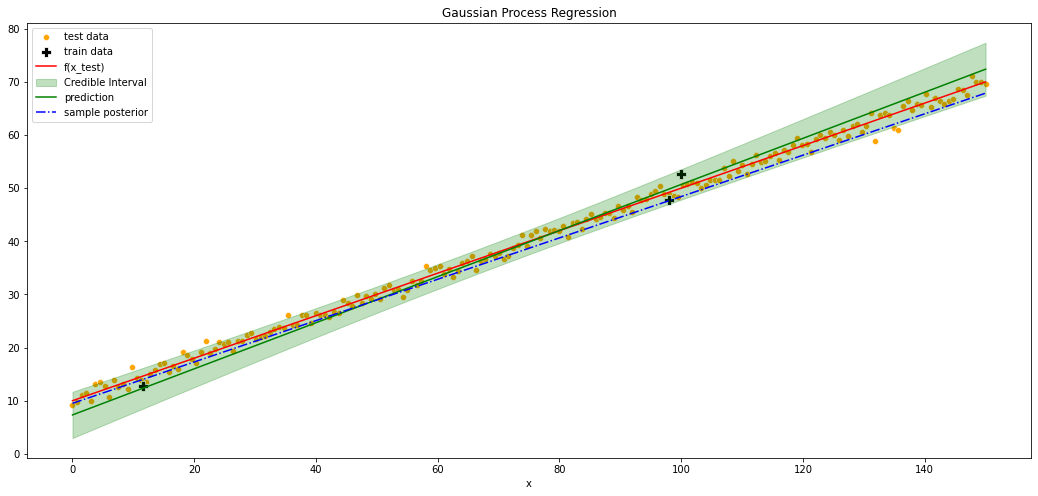

In [9]:
plot(x, x_test, y_test, x_train, y_train, f, y_prediction, y_posterior)

The figure above shows that the DotProduct kernel is able to generate only linear samples as expected from derivation that a BLR is a GPR with DotProduct kernel. Notice how the error bars get larger for input values that are distant from any training points.

### Squared-Exponential Kernel

Now we use the [Squared-Exponential (Radial basis function - RBF)](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html) kernel: 

\begin{equation}
K(x,x')=\sigma_{f}\exp\left(-\frac{1}{2l^{2}}||x-x'||^{2}\right), \tag{7.1}
\end{equation}

to tackle more exciting functions.

In [10]:
sigma_f = 1
l = 1
kernel_rbf = ConstantKernel(constant_value=sigma_f) * RBF(length_scale=l)

x = np.linspace(start=0, stop=150, num=1000)
x_train,y_train = random_dataset_train(f,100,5,sigma_noise_data)
x_test,y_test = random_dataset_test(f,150,200,sigma_noise_data)

In [11]:
y_prediction, std, params, y_posterior = gaussian_process_regressor(x, x_train, x_test, kernel_rbf)

MSE Of Test Set : 7.181170007104532


{'k1': 46.4**2,
 'k2': RBF(length_scale=142),
 'k1__constant_value': 2155.488969086652,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': 141.52603659547069,
 'k2__length_scale_bounds': (1e-05, 100000.0)}

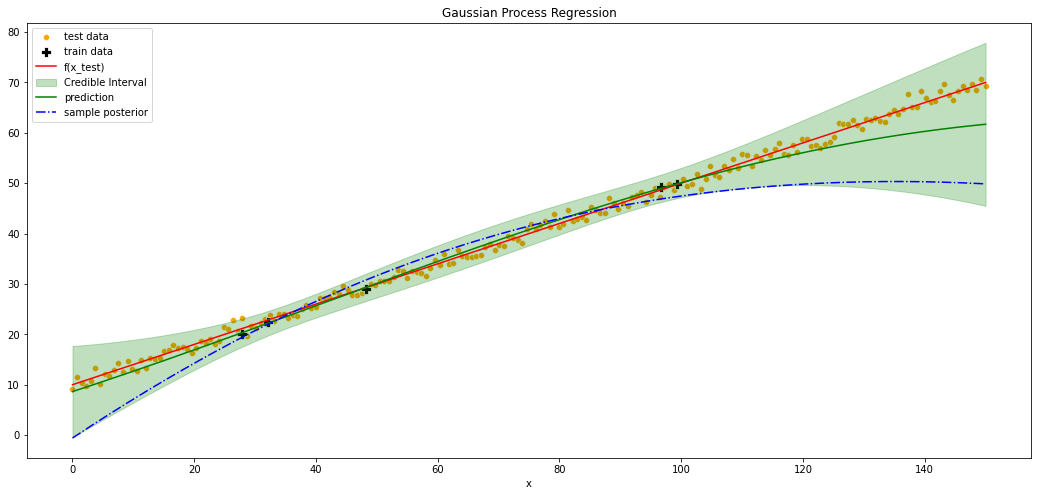

In [12]:
plot(x, x_test, y_test, x_train, y_train, f, y_prediction, y_posterior)

A much richer class of functions can be generated with the Squared-Exponential kernel. In fact, this kernel corresponds to a Bayesian linear regression model with an infinite dimensional basis (we can make the train data set as large as we want and the space the kernel operates in keeps growing without bound). Notice how the error bars get larger for input values that are distant from any training points.

### Another example with more complicated function and RBF kernel

Let us play with the function

\begin{equation}
f(x)=\sin(4\pi x)+\sin(7\pi x), \tag{8.1}
\end{equation}

 on the range $x\in[0,2]$ for train data and $x\in[0,3]$ for
test data. We generate both train and test data utilizing this function
with white noise $\epsilon=\mathcal{N}\left(0,\sigma^{2}\right)$,
where $\sigma=0.1$.

MSE Of Test Set : 0.2969992937436489


{'k1': 1.16**2,
 'k2': RBF(length_scale=0.0806),
 'k1__constant_value': 1.3415961192717245,
 'k1__constant_value_bounds': (0.01, 100.0),
 'k2__length_scale': 0.08064207259886919,
 'k2__length_scale_bounds': (0.01, 100.0)}

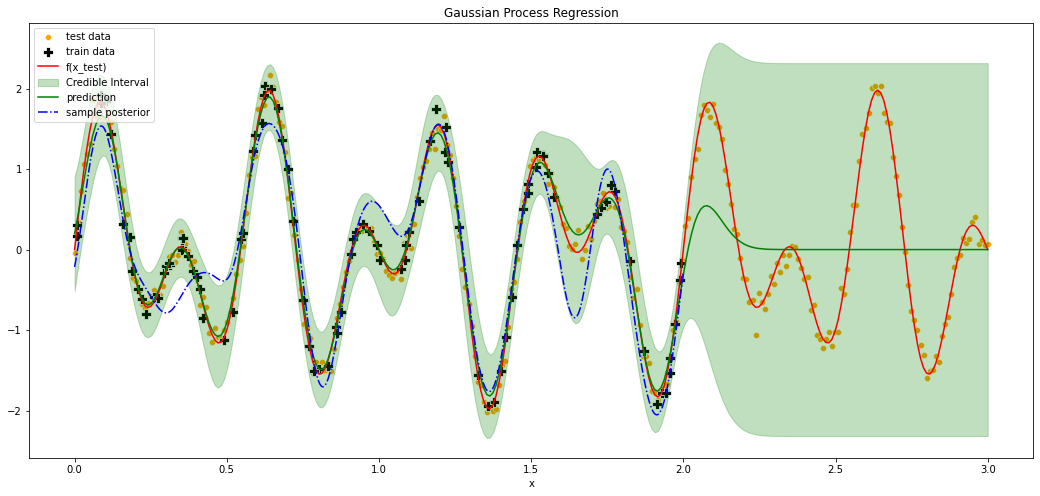

In [22]:
#nonlinear function
def g(x):
#     g_x = np.exp(-x) * np.sin(4*x) + (x-1)*np.heaviside(x-1,0) - 0.732
    g_x = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return g_x

sigma_noise_data = 0.1

x = np.linspace(start=0, stop=2, num=500)
x_train,y_train = random_dataset_train(g,2,100,sigma_noise_data)
x_test,y_test = random_dataset_test(g,3,300,sigma_noise_data)

sigma_f = 3
l = 1
kernel_rbf2 = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2, 1e2)) \
              * RBF(length_scale=l, length_scale_bounds=(1e-2, 1e2))

sigma_n = 0.5
y_prediction, std, params, y_posterior = gaussian_process_regressor(x, x_train, x_test, kernel_rbf2,sigma_n)

plot(x, x_test, y_test, x_train, y_train, g, y_prediction, y_posterior)

## Gaussian process regression (GPR) on Mauna Loa CO2 data

This example is based on Section 5.4.3 of “Gaussian Processes for Machine Learning”. It illustrates an example of complex kernel engineering and hyperparameter optimization using gradient ascent on the log-marginal-likelihood. The data consists of the monthly average atmospheric CO2 concentrations (in parts per million by volume (ppm)) collected at the Mauna Loa Observatory in Hawaii, between 1958 and 2001. The objective is to model the CO2 concentration as a function of the time and extrapolate for years after 2001. Reference [here](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html).

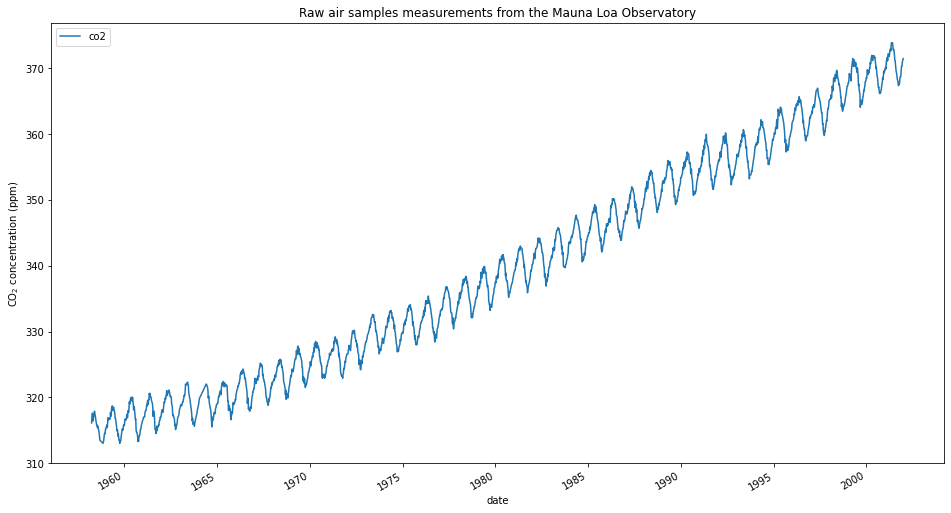

In [19]:
from sklearn.datasets import fetch_openml
import pandas as pd

co2 = fetch_openml(data_id=41187, as_frame=True)
co2.frame.head()


co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")
co2_data.head()



plt.rcParams["figure.figsize"] = [16,9]


co2_data.plot()
plt.ylabel("CO$_2$ concentration (ppm)")
_ = plt.title("Raw air samples measurements from the Mauna Loa Observatory")

In [27]:
#Monthly average
co2_data = co2_data.resample("M").mean().dropna(axis="index", how="any")
# co2_data.plot()
# plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
# _ = plt.title(
#     "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory"
# )

X = (co2_data.index.year + co2_data.index.month / 12).to_numpy().reshape(-1, 1)
y = co2_data["co2"].to_numpy()

50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)

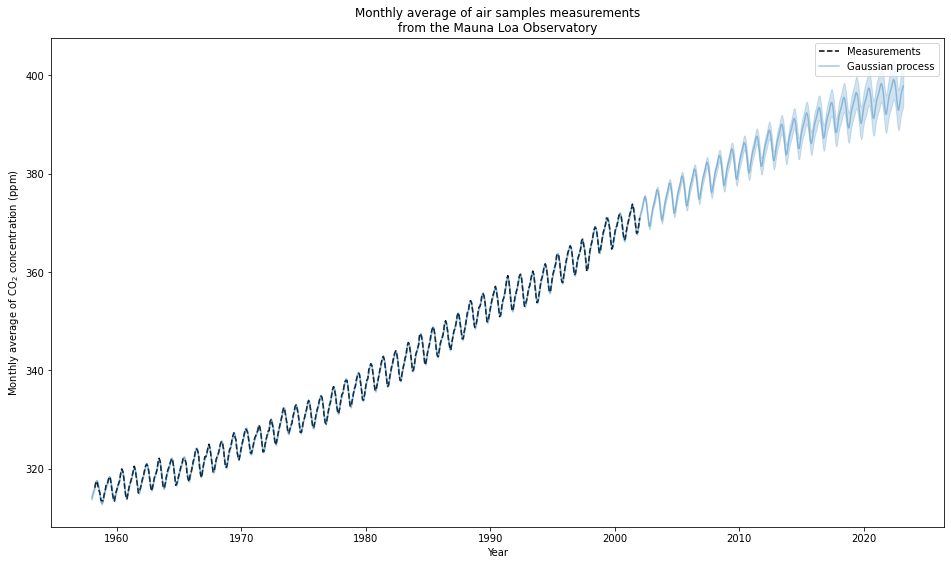

In [21]:
#Kernels
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic, WhiteKernel

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)

seasonal_kernel = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=1.0, periodicity=1.0, periodicity_bounds="fixed")
)

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

co2_kernel = (
    long_term_trend_kernel + seasonal_kernel + irregularities_kernel + noise_kernel
)
# display(co2_kernel)

#Model fitting and prediction
y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=co2_kernel, normalize_y=False)
gaussian_process.fit(X, y - y_mean)

#Plot results

import datetime

today = datetime.datetime.now()
current_month = today.year + today.month / 12
X_test = np.linspace(start=1958, stop=current_month, num=1_000).reshape(-1, 1)
mean_y_pred, std_y_pred = gaussian_process.predict(X_test, return_std=True)
mean_y_pred += y_mean

plt.plot(X, y, color="black", linestyle="dashed", label="Measurements")
plt.plot(X_test, mean_y_pred, color="tab:blue", alpha=0.4, label="Gaussian process")
plt.fill_between(
    X_test.ravel(),
    mean_y_pred - std_y_pred,
    mean_y_pred + std_y_pred,
    color="tab:blue",
    alpha=0.2,
)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
_ = plt.title(
    "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory"
)

### Nonlinear function with "Super Kernel"

MSE Of Test Set : 0.09087895007742033


/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warning

{'k1': 0.00316**2 * RBF(length_scale=960) + 1.7**2 * RBF(length_scale=1.51) * ExpSineSquared(length_scale=1.31, periodicity=0.561) + 0.00316**2 * RationalQuadratic(alpha=21.3, length_scale=1.89e-05) + 0.00316**2 * RBF(length_scale=3.55),
 'k2': WhiteKernel(noise_level=1e-05),
 'k1__k1': 0.00316**2 * RBF(length_scale=960) + 1.7**2 * RBF(length_scale=1.51) * ExpSineSquared(length_scale=1.31, periodicity=0.561) + 0.00316**2 * RationalQuadratic(alpha=21.3, length_scale=1.89e-05),
 'k1__k2': 0.00316**2 * RBF(length_scale=3.55),
 'k1__k1__k1': 0.00316**2 * RBF(length_scale=960) + 1.7**2 * RBF(length_scale=1.51) * ExpSineSquared(length_scale=1.31, periodicity=0.561),
 'k1__k1__k2': 0.00316**2 * RationalQuadratic(alpha=21.3, length_scale=1.89e-05),
 'k1__k1__k1__k1': 0.00316**2 * RBF(length_scale=960),
 'k1__k1__k1__k2': 1.7**2 * RBF(length_scale=1.51) * ExpSineSquared(length_scale=1.31, periodicity=0.561),
 'k1__k1__k1__k1__k1': 0.00316**2,
 'k1__k1__k1__k1__k2': RBF(length_scale=960),
 'k1__

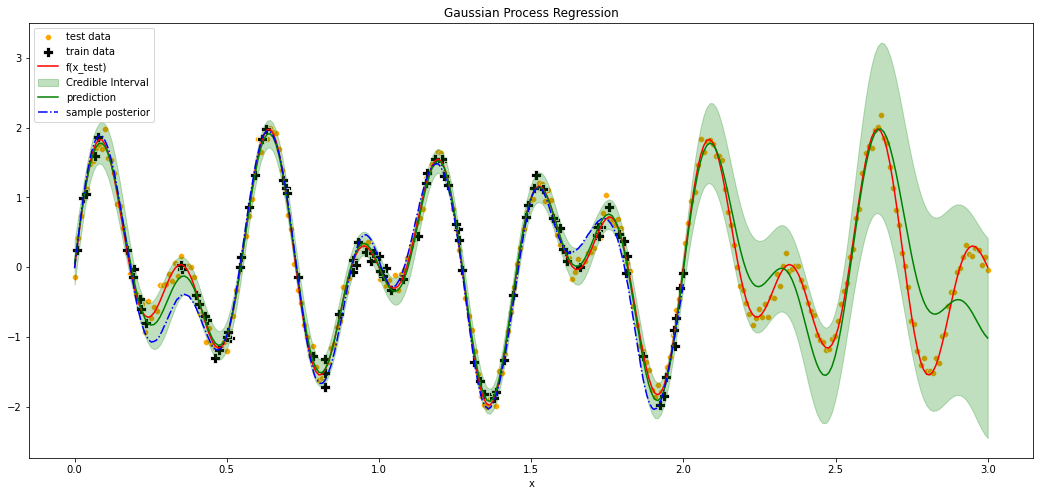

In [32]:
#nonlinear function
def g(x):
#     g_x = np.exp(-x) * np.sin(4*x) + (x-1)*np.heaviside(x-1,0) - 0.732
    g_x = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return g_x

sigma_noise_data = 0.1

x = np.linspace(start=0, stop=2, num=500)
x_train,y_train = random_dataset_train(g,2,100,sigma_noise_data)
x_test,y_test = random_dataset_test(g,3,300,sigma_noise_data)

from sklearn.gaussian_process.kernels import ExpSineSquared, RationalQuadratic, WhiteKernel
super_kernel = 50**2 * RBF(length_scale=50) + 2**2 * RBF(length_scale=100) * ExpSineSquared(length_scale=1, periodicity=1) \
                + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)

sigma_n = 0.25
y_prediction, std, params, y_posterior = gaussian_process_regressor(x, x_train, x_test, super_kernel,sigma_n)

plot(x, x_test, y_test, x_train, y_train, g, y_prediction, y_posterior)

### Nonlinear function with ExpSineSquared


\begin{equation}
k(x,x')=\sigma_{f}\exp\left(-\frac{2\sin^{2}\left(\pi\Vert x-x'\Vert/p\right)}{l^{2}}\right), \tag{9.1}
\end{equation}

This kernel allows modeling periodic functions

MSE Of Test Set : 0.07431494340796982


/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/matheus/python/matheus_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.


{'k1': 0.00316**2 * RBF(length_scale=1e+05) + 1.6**2 * RBF(length_scale=1.4) * ExpSineSquared(length_scale=1.28, periodicity=0.562) + 0.00316**2 * RationalQuadratic(alpha=4.58, length_scale=1.01e+03) + 0.00316**2 * RBF(length_scale=0.0971),
 'k2': WhiteKernel(noise_level=1e-05),
 'k1__k1': 0.00316**2 * RBF(length_scale=1e+05) + 1.6**2 * RBF(length_scale=1.4) * ExpSineSquared(length_scale=1.28, periodicity=0.562) + 0.00316**2 * RationalQuadratic(alpha=4.58, length_scale=1.01e+03),
 'k1__k2': 0.00316**2 * RBF(length_scale=0.0971),
 'k1__k1__k1': 0.00316**2 * RBF(length_scale=1e+05) + 1.6**2 * RBF(length_scale=1.4) * ExpSineSquared(length_scale=1.28, periodicity=0.562),
 'k1__k1__k2': 0.00316**2 * RationalQuadratic(alpha=4.58, length_scale=1.01e+03),
 'k1__k1__k1__k1': 0.00316**2 * RBF(length_scale=1e+05),
 'k1__k1__k1__k2': 1.6**2 * RBF(length_scale=1.4) * ExpSineSquared(length_scale=1.28, periodicity=0.562),
 'k1__k1__k1__k1__k1': 0.00316**2,
 'k1__k1__k1__k1__k2': RBF(length_scale=1e+0

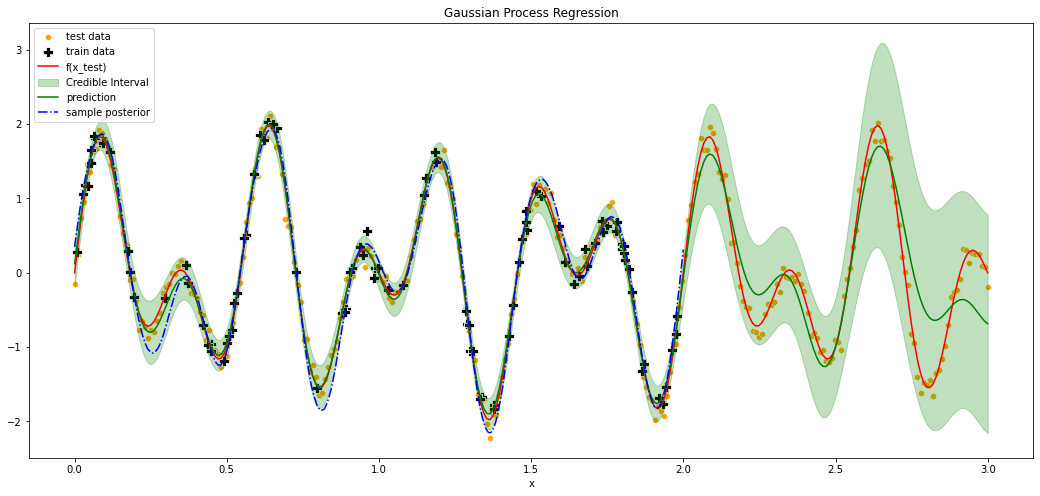

In [31]:
#nonlinear function
def g(x):
#     g_x = np.exp(-x) * np.sin(4*x) + (x-1)*np.heaviside(x-1,0) - 0.732
    g_x = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return g_x

sigma_noise_data = 0.1

x = np.linspace(start=0, stop=2, num=500)
x_train,y_train = random_dataset_train(g,2,100,sigma_noise_data)
x_test,y_test = random_dataset_test(g,3,300,sigma_noise_data)

from sklearn.gaussian_process.kernels import ExpSineSquared
oscilating_kernel = ConstantKernel(constant_value=3, constant_value_bounds=(1e-2, 1e2)) * ExpSineSquared(length_scale=1, periodicity=1) \
                    + ConstantKernel(constant_value=1, constant_value_bounds=(1e-2, 1e2)) * ExpSineSquared(length_scale=1, periodicity=1)

sigma_n = 0.25
y_prediction, std, params, y_posterior = gaussian_process_regressor(x, x_train, x_test, super_kernel,sigma_n)

plot(x, x_test, y_test, x_train, y_train, g, y_prediction, y_posterior)

## Disadvantages of Gaussian Process Regression


 - It is expensive to build a model when there is a lot of training data.
An implementation of the algorithm explained here requires the inversion
of the covariance matrix $\Sigma=K(X,X)$ using (Cholesky factorization),
with a memory complexity of $O(n^{2})$ and a computational complexity
of $O(n^{3})$. There has been work on GP models that only include
a **subset of the data** (Gramacy and Apley 2015) which can be
implemented efficiently (Gramacy et al. 2014).
 - Finding kernels that suit the data can be time consuming, and it is an ongoing research area.
 -  Another issue of the model is stationary covariance function is assumed,
but for many problems, the character of the covariance function needs
to change in different regimes. Gramacy and Lee (2008) developed a
**hybrid tree-Gaussian process model** that allows the
covariance function to change over the range of input data.

### Alternatives

 -  Alternatives of GPR are the Bayesian Multiple Adaptive Regression Splines
(**MARS**) which can automatically handle some of the issues
with nonstationary covariances, and the underlying computation in
fitting a Bayesian MARS model is a least-squares solve, which can
be done efficiently.
 - The **twin Gaussian process** is a structured prediction method
which uses Gaussian process priors on both covariates and
responses, both multivariate. This method predicts outputs by minimizing
the Kullback-Leibler divergence between two GP modeled as normal
distributions over finite index sets of training and testing examples.
It's based on the fact that similar inputs should
produce similar percepts. (Mohammad Mojaddady, Moin Nabi, and Shahram
Khadivi - Stock Market Prediction using Twin Gaussian Process Regression).

<div>
   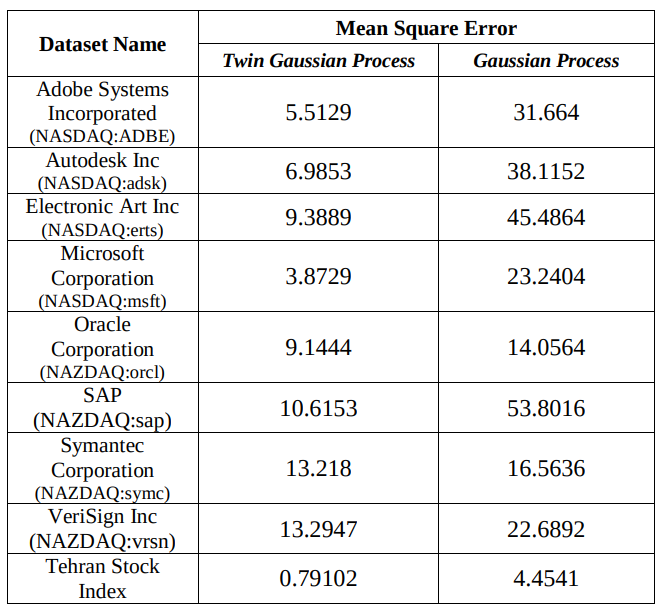
</div>

 - Use it together with other models (auto-encoder, recurrent neural
network (RNN) and long short-term memory (LSTM)) to construct the
interval prediction of the input signal and analyze the uncertainties
(e.g. stock market). [Ref](https://doi.org/10.1016/j.asoc.2021.107898):
Stock index prediction and uncertainty analysis using multi-scale
nonlinear ensemble paradigm of optimal feature extraction, two-stage
deep learning and Gaussian process regression, Wang et al. 2021.